# Classification of Radar Returns Using Supervised Machine Learning Models

# Introduction
The ionosphere is a layer of the Earth's atmosphere that contains a high concentration of free electrons and ions (see figure 1 below).  This layer is of particular importance since different regions within this layer of the atmosphere make long distance radio communication possible by reflecting radio waves back to Earth.  Since this layer is so far up in the atmosphere, the most practical way to study this layer of the atmosphere is by seeing how this layer responds to electromagnetic waves.  However, in order to measure and analyze this response, the radar signals that are not reflected back towards Earth and simply pass through the exopshere into space have to be seperated out from the good signals.  This can be a tedious and very time consuming process to do by hand.  That is why the objective of this study is to test a number of supervised machine learning algorithms to find the most effective model for classifying these radar signals in order to help to automate the processing of these radar signals.

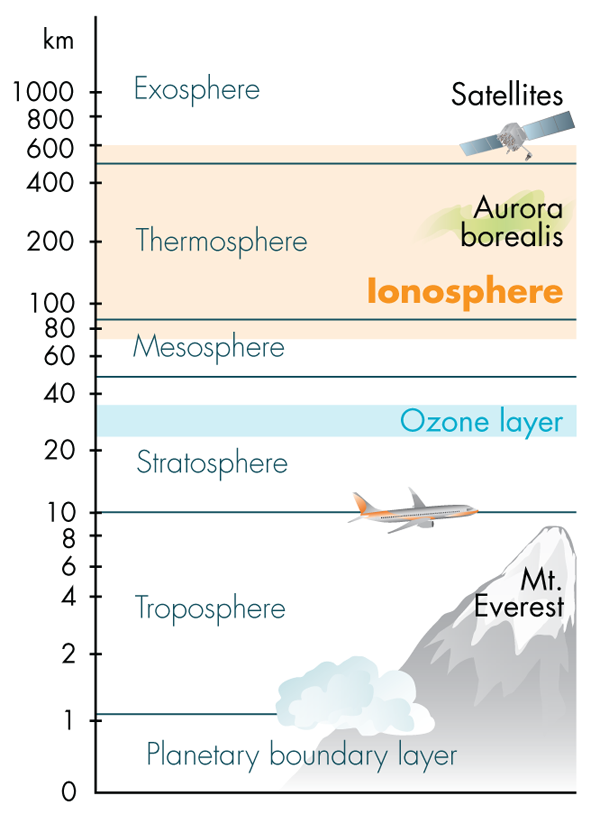

FIGURE 1: An Image Depicting the Layers of the Atmosphere and Their Relative Heights


In [41]:
# Display Image of Ionosphere
from IPython.display import Image
image = Image(filename='C:\\Users\halln\Desktop\ionosphere.png')
display(image)
print("FIGURE 1: An Image Depicting the Layers of the Atmosphere and Their Relative Heights")

# Data Used
[UCI ML Repository Ionosphere Dataset](https://archive.ics.uci.edu/ml/datasets/ionosphere)

[Previous Study Using Data](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf)

In [42]:
import timeit
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Import sklearn and required packages
import sklearn
from sklearn import tree
from sklearn.svm import SVC
from sklearn import ensemble 
from sklearn import neighbors
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [43]:
# Read in data and prepare to feed into models
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Ionosphere_prediction\ionosphere.csv')
# Assign Column Names
df.columns = ['RR1','RR2','RR3','RR4','RR5',
              'RR6','RR7','RR8','RR9','RR10',
              'RR11','RR12','RR13','RR14','RR15',
              'RR16','RR17','RR18','RR19','RR20',
              'RR21','RR22','RR23','RR24','RR25',
              'RR26','RR27','RR28','RR29','RR30',
              'RR31','RR32','RR33','RR34','OUTCOME']
# Recode outcome variable to binary indicator 
df['Signal_Good?'] = (df['OUTCOME'] == 'g')
df = df.drop(['OUTCOME'],axis=1)
# Display top 5 rows of data
df.head(n=5)

,RR1,RR2,RR3,RR4,RR5,RR6,RR7,RR8,RR9,RR10,...,RR26,RR27,RR28,RR29,RR30,RR31,RR32,RR33,RR34,Signal_Good?
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,False
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,True
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,False
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,True
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,False


In [44]:
# Data is already scaled due to autocorrelation function - RR1 and RR2 also are not needed
df.describe()

,RR1,RR2,RR3,RR4,RR5,RR6,RR7,RR8,RR9,RR10,...,RR25,RR26,RR27,RR28,RR29,RR30,RR31,RR32,RR33,RR34
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471518,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335318,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816777,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data set contains 350 observations: 224 good signals and 126 bad signals


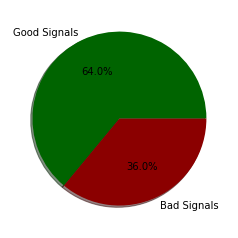

In [45]:
# Sort data into good and bad signals and print sizes of each
good = df[df['Signal_Good?']==True]
bad = df[df['Signal_Good?']==False]
print("The data set contains {} observations: {} good signals and {} bad signals".format(len(df),len(good),len(bad)))
# Create pie chart comparing sizes
sizes = [(len(good)/len(df))*100,(len(bad)/len(df))*100]
plt.pie(sizes,labels=('Good Signals','Bad Signals'),colors=('darkgreen','darkred'),autopct='%1.1f%%',shadow=True)
plt.show()

Text(0.5, 1.0, 'Bad Radar Signals')

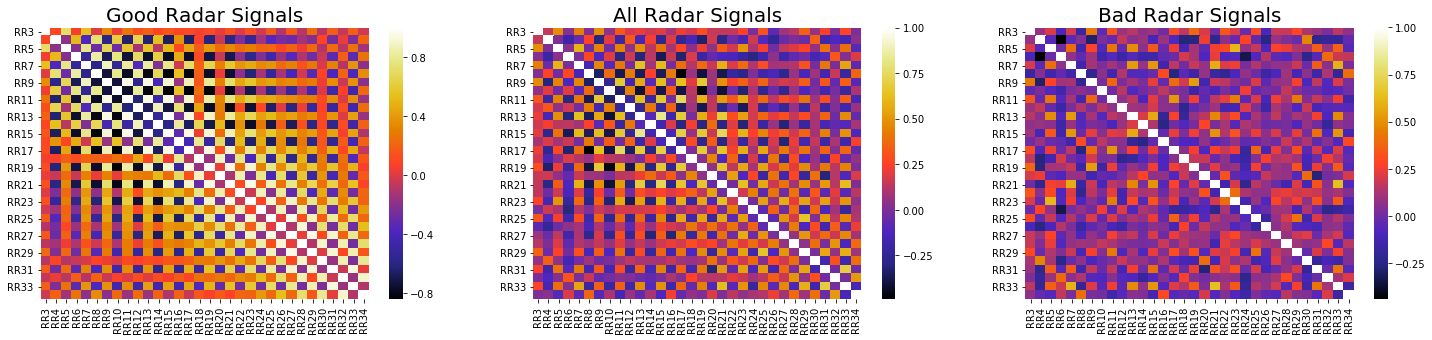

In [46]:
# Drop labels not needed in plots
gd = good.drop(labels=['RR1','RR2','Signal_Good?'],axis=1)
bd = bad.drop(labels=['RR1','RR2','Signal_Good?'],axis=1)
all_ = df.drop(labels=['RR1','RR2','Signal_Good?'],axis=1)
# Create Plots
f = plt.figure(figsize=(25,5))
plt.subplot(131)
sns.heatmap(gd.corr(),cmap='CMRmap')
plt.title("Good Radar Signals",size=20)
plt.subplot(132)
sns.heatmap(all_.corr(),cmap='CMRmap')
plt.title("All Radar Signals",size=20)
plt.subplot(133)
sns.heatmap(bd.corr(),cmap='CMRmap')
plt.title("Bad Radar Signals",size=20)

In [47]:
# Drop first 2 columns from data
df = df.drop(['RR1','RR2'],axis=1)
# Seperate into outcome variable and predictors
Y = df['Signal_Good?']
Y.columns = ['Signal_Good?']
X = df.drop('Signal_Good?',axis=1)

In [48]:
# Define Function to evaluate models below

# Create variables to store values from models in
full_set_accuracy = []
cross_val_accuracy = []
execution_time = []

def test_model(regression):
# Fit model and time it
    start = timeit.default_timer()
    regression.fit(X,Y)
    stop = timeit.default_timer()
    time = stop-start
# Generate Confusion Matrix
    y_pred = regression.predict(X)
    actual = pd.DataFrame(Y)
    actual.columns=['Actual_Values->']
    actual['Predicted'] = y_pred >=0.75
    table = pd.crosstab(actual['Predicted'],actual['Actual_Values->'])
# Calculate Predictive Accuracy
    df1 = pd.DataFrame()
    df1['Actual_Values'] = Y
    df1['Predicted_Values'] = y_pred >= 0.75
    df2 = df1[df1['Actual_Values']==df1['Predicted_Values']]
    print('{} predicted correctly out of {} from training set'.format(len(df2),len(df1)))
    print('''''')
    print('Training Set Predictive Accuracy: {}%'.format(round((len(df2)/len(df1))*100),2))
    full_set_accuracy.append(round((len(df2)/len(df1))*100,2))
    execution_time.append(time)
# Calculate 5 Fold Cross Validation Accuracy
    score = cross_val_score(regression,X,Y,cv=5)
    print(''' ''')
    print("5 Fold Cross Validation Predictive Accuracy: {}%".format(round(score.mean()*100,2)))
    cross_val_accuracy.append(round(score.mean()*100,2))
    return table

In [49]:
# NAIVE BAYES
bnb = BernoulliNB()
test_model(bnb)

297 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 85%
 
5 Fold Cross Validation Predictive Accuracy: 83.98%


Actual_Values->,False,True
Predicted,,
False,93,20
True,33,204


In [50]:
# ORDINARY LEAST SQUARES REGRESSION
ols = linear_model.LinearRegression()
test_model(ols)

288 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 82%
 
5 Fold Cross Validation Predictive Accuracy: 7.93%


Actual_Values->,False,True
Predicted,,
False,117,53
True,9,171


In [51]:
# LOGISTIC REGRESSION
log = linear_model.LogisticRegression(solver='lbfgs')
test_model(log)

311 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 89%
 
5 Fold Cross Validation Predictive Accuracy: 82.02%


Actual_Values->,False,True
Predicted,,
False,98,11
True,28,213


In [52]:
# KNN CLASSIFIER
knn_c = neighbors.KNeighborsClassifier(n_neighbors=10)
test_model(knn_c)

297 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 85%
 
5 Fold Cross Validation Predictive Accuracy: 84.0%


Actual_Values->,False,True
Predicted,,
False,78,5
True,48,219


In [53]:
# KNN REGRESSION
knn_r = neighbors.KNeighborsRegressor(n_neighbors=10)
test_model(knn_r)

319 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 91%
 
5 Fold Cross Validation Predictive Accuracy: 24.06%


Actual_Values->,False,True
Predicted,,
False,100,5
True,26,219


In [54]:
# DECISION TREE CLASSIFIER 
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                max_depth=3)
test_model(dt)

323 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 92%
 
5 Fold Cross Validation Predictive Accuracy: 89.73%


Actual_Values->,False,True
Predicted,,
False,112,13
True,14,211


In [55]:
# RANDOM FOREST CLASSIFIER 
rfc = ensemble.RandomForestClassifier(n_estimators=7)
test_model(rfc)

345 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 99%
 
5 Fold Cross Validation Predictive Accuracy: 91.44%


Actual_Values->,False,True
Predicted,,
False,123,2
True,3,222


In [56]:
# SUPPORT VECTOR MACHINE
svc = SVC(gamma='auto')
test_model(svc)

331 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 95%
 
5 Fold Cross Validation Predictive Accuracy: 93.42%


Actual_Values->,False,True
Predicted,,
False,109,2
True,17,222


In [57]:
# PARTIAL LEAST SQUARES 
pls = PLSRegression(n_components=4)
test_model(pls)

289 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 83%
 
5 Fold Cross Validation Predictive Accuracy: 21.84%


Actual_Values->,False,True
Predicted,,
False,117,52
True,9,172


In [58]:
# LASSO REGRESSION
lasso = linear_model.Lasso(alpha=10)
test_model(lasso)

126 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 36%
 
5 Fold Cross Validation Predictive Accuracy: -7.89%


Actual_Values->,False,True
Predicted,,
False,126,224


In [59]:
# RIDGE REGRESSION
ridge = linear_model.Ridge(alpha=10)
test_model(ridge)

288 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 82%
 
5 Fold Cross Validation Predictive Accuracy: 23.61%


Actual_Values->,False,True
Predicted,,
False,118,54
True,8,170


In [60]:
# Collect results from models in one dataframe
models = ['Naive Bayes','Ordinary Least Squares','Logistic Regression', 'KNN Classifier','KNN Regression',
          'Decision Tree Classifier','Random Forest Classifier','Support Vector Machine',
          'Partial Least Squares','Lasso Regression','Ridge Regression']
results = pd.DataFrame(index=models)
results['Model Accuracy (%)'] = full_set_accuracy
results['5 Fold Cross Validation Accuracy (%)'] = cross_val_accuracy
results['Runtime (Seconds)'] = execution_time

In [61]:
# Display results and sort by execution time
model_results = results.sort_values(by='Runtime (Seconds)')
model_results

,Model Accuracy (%),5 Fold Cross Validation Accuracy (%),Runtime (Seconds)
Lasso Regression,36.00,-7.89,0.002034
KNN Classifier,84.86,84.00,0.002063
Naive Bayes,84.86,83.98,0.002504
KNN Regression,91.14,24.06,0.003581
Ordinary Least Squares,82.29,7.93,0.003836
Ridge Regression,82.29,23.61,0.003971
Partial Least Squares,82.57,21.84,0.005174
Support Vector Machine,94.57,93.42,0.008706
Decision Tree Classifier,92.29,89.73,0.014194
Logistic Regression,88.86,82.02,0.015329


Initial Results seem fairly good - could the accuracy or runtimes be improved using principal component analysis (PCA)?

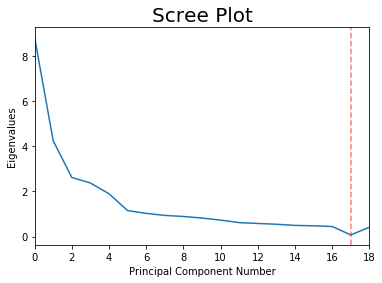

In [62]:
# Generate data for scree plot
scree_data = StandardScaler().fit_transform(X)
Xt = scree_data.T
Cx = np.cov(Xt)
eig_val_cov,eig_vec_cov = np.linalg.eig(Cx)

# Display Scree Plot
plt.plot(eig_val_cov)
plt.title("Scree Plot",size=(20))
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalues")
plt.xlim(0,18)
plt.axvline(17,c='r',linestyle='--',alpha=0.5)

Based on the scree plot it seems that the data could be accurately represented using 17 components

In [63]:
# Do PCA to compress data into 17 features
sklearn_pca = PCA(n_components=17)
compressed_df = sklearn_pca.fit_transform(X)

# Specify data for models
X = compressed_df
Y = df['Signal_Good?']

# Create variables to store output from models in
full_set_accuracy = []
cross_val_accuracy = []
execution_time = []

In [64]:
# SUPPORT VECTOR MACHINE
svc = SVC(gamma='auto')
test_model(svc)

333 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 95%
 
5 Fold Cross Validation Predictive Accuracy: 93.43%


Actual_Values->,False,True
Predicted,,
False,113,4
True,13,220


In [65]:
# DECISION TREE CLASSIFIER 
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                max_depth=3)
test_model(dt)

326 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 93%
 
5 Fold Cross Validation Predictive Accuracy: 87.71%


Actual_Values->,False,True
Predicted,,
False,107,5
True,19,219


In [66]:
# RANDOM FOREST CLASSIFIER 
rfc = ensemble.RandomForestClassifier(n_estimators=7)
test_model(rfc)

346 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 99%
 
5 Fold Cross Validation Predictive Accuracy: 93.41%


Actual_Values->,False,True
Predicted,,
False,123,1
True,3,223


In [67]:
# KNN CLASSIFIER
knn_c = neighbors.KNeighborsClassifier(n_neighbors=10)
test_model(knn_c)

309 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 88%
 
5 Fold Cross Validation Predictive Accuracy: 84.86%


Actual_Values->,False,True
Predicted,,
False,90,5
True,36,219


In [68]:
# LOGISTIC REGRESSION
log = linear_model.LogisticRegression(solver='lbfgs')
test_model(log)

301 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 86%
 
5 Fold Cross Validation Predictive Accuracy: 83.45%


Actual_Values->,False,True
Predicted,,
False,92,15
True,34,209


In [69]:
# Collect results from models into one dataframe
models = ['Support Vector Machine','Decision Tree Classifier','Random Forest Classifier','KNN Classifier', 'Logistical Regression']
results = pd.DataFrame(index=models)
results['Model Accuracy (%)'] = full_set_accuracy
results['5 Fold Cross Validation Accuracy (%)'] = cross_val_accuracy
results['Runtime (Seconds)'] = execution_time

In [70]:
# Display results and sort by execution time
pca_results = results.sort_values(by='Runtime (Seconds)')
pca_results

,Model Accuracy (%),5 Fold Cross Validation Accuracy (%),Runtime (Seconds)
KNN Classifier,88.29,84.86,0.001317
Support Vector Machine,95.14,93.43,0.004717
Decision Tree Classifier,93.14,87.71,0.006492
Logistical Regression,86.00,83.45,0.013466
Random Forest Classifier,98.86,93.41,0.015048


In [71]:
# Compare to initial model results
model_results

,Model Accuracy (%),5 Fold Cross Validation Accuracy (%),Runtime (Seconds)
Lasso Regression,36.00,-7.89,0.002034
KNN Classifier,84.86,84.00,0.002063
Naive Bayes,84.86,83.98,0.002504
KNN Regression,91.14,24.06,0.003581
Ordinary Least Squares,82.29,7.93,0.003836
Ridge Regression,82.29,23.61,0.003971
Partial Least Squares,82.57,21.84,0.005174
Support Vector Machine,94.57,93.42,0.008706
Decision Tree Classifier,92.29,89.73,0.014194
Logistic Regression,88.86,82.02,0.015329


# Effects of PCA on Models
    - Improved overall accuracy of RFC, SVM, DT, and KNN Classifier
    - Reduced runtimes for models
    - Size of data needed for models is reduced by roughly half

The PCA seemed to improve the results for many of the models, could gradient boosting further improve on the decision trees model?

In [72]:
# Re-define variables to feed into model
Y = df['Signal_Good?']
Y.columns = ['Signal_Good?']
X = df.drop('Signal_Good?',axis=1)

# Specify Parameters for Decision Tree model
params = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'deviance'}

# Store execution time
execution_time = []

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
test_model(clf)

350 predicted correctly out of 350 from training set

Training Set Predictive Accuracy: 100%
 
5 Fold Cross Validation Predictive Accuracy: 93.16%


Actual_Values->,False,True
Predicted,,
False,126,0
True,0,224


In [73]:
# Show runtime for gradient boosted decision trees model
print("The gradient boosted decision tree runtime is {} seconds".format(execution_time))

The gradient boosted decision tree runtime is [0.9195567960000517] seconds


# Estimation of Runtimes for Real World Applications
goose bay produces 25 measurements every 5 seconds all year round.  This means that the data above is only representative of 70 seconds of measurements taken from this site.
Since this site is collecting year-round, how long would it take to process a full year of data?

    350 measurements / 25 every 5 seconds = only 70 seconds of measurements from this location included in dataset

# Number of Seconds in a Year
    1 day = 24 hours * 60 minutes * 60 seconds = 86400 seconds in a day
    1 year = 365 days * 86400 seconds = 31536000 seconds in a year

# Measurements Taken Per Year 
    31536000 seconds per year / 5 seconds per measuremnt = 6307200 
    6307200 * 25 measurments = 157680000 measurments per year

# Adjusted Runtime for 1s Example
    157680000 / 350 measurements processsed per second = 450514.2857 seconds to process a year of data 
    450514.2857 seconds to process a year of data / 3600 seconds in an hour = 125.1428 = ~125 hours to run

In [74]:
# Define function to adjust runtimes for full year of data
def adjust_runtime(X):
    # Determine runtime for single 5s of measurements
    X_5s = X / 14
    # Adjust for measurements per year
    X_yr = X_5s * 6307200
    return X_yr

In [80]:
import datetime
# Calculate Projected Execution Times for 1 Full Year of Measurements 
model_results['Adjusted Execution Time (Seconds)'] = model_results.loc[:,'Runtime (Seconds)'].apply(lambda x: adjust_runtime(x))
adjusted_times = pd.DataFrame(model_results['Adjusted Execution Time (Seconds)'])
adjusted_times['Adjusted Execution Time (Hours)'] = adjusted_times['Adjusted Execution Time (Seconds)'].apply(lambda x: str(datetime.timedelta(seconds=x)))
print("Projected Execution Times for 1 Year of Data")
adjusted_times['Adjusted Execution Time (Hours)']

Projected Execution Times for 1 Year of Data


Lasso Regression            0:15:16.358672
KNN Classifier              0:15:29.286630
Naive Bayes                 0:18:48.309875
KNN Regression              0:26:53.451139
Ordinary Least Squares      0:28:48.102069
Ridge Regression            0:29:48.999887
Partial Least Squares       0:38:50.955959
Support Vector Machine      1:05:22.293153
Decision Tree Classifier    1:46:34.776824
Logistic Regression         1:55:05.774004
Random Forest Classifier    2:23:49.963807
Name: Adjusted Execution Time (Hours), dtype: object

# Conclusions
Of these models the most effective is the gradient boosted decision trees model.  However, the runtime of this model could be problematic meaning that if the data is required to be processed in a shorted timeframe it would most likely be better to choose a different less computationally intensive model.  However, for the purposes of this data the best model should simply be the model that procudes the fewest type 1 errors (eg. the fewest false positives) making the most effective models either the random forest, which produced only 1 type 1 error or the gradient boosted decision trees model which accurately predicted all entries from the training set.  